In [1]:
# Code to mount google drive in case you are loading the data from your google drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/Colab Notebooks/

Mounted at /gdrive
/gdrive/My Drive/Colab Notebooks


In [2]:
# Loading data from csv file
import pandas as pd
data_path = 'logistic_regression_assignment_data.csv'

df = pd.read_csv(data_path)
df

,category,text
0,0,worldcom boss left books alone former worldc...
1,1,tigers wary of farrell gamble leicester say ...
2,1,yeading face newcastle in fa cup premiership s...
3,1,henman hopes ended in dubai third seed tim hen...
4,1,wilkinson fit to face edinburgh england captai...
...,...,...
1012,0,wall street cool to ebay s profit shares in on...
1013,0,ban on forced retirement under 65 employers wi...
1014,1,time to get tough on friendlies for an intern...
1015,0,christmas shoppers flock to tills shops all ov...


#### **Note:** Here class-0 is of category "business" and class-1 is of category "sport"

In [3]:
# Data Overiview
df['category'].value_counts()

1    509
0    508
Name: category, dtype: int64

### Creating Train and Test Datasets


In [4]:
# Splitting the data into train and test

from sklearn.model_selection import train_test_split

text = df['text']
category = df['category']
train_text, test_text, train_category, test_category = train_test_split(text, category, random_state=42, stratify=category, test_size=0.01)

print("Shape of Train_Text = ", train_text.shape)
print("Shape of Test_Text = ", test_text.shape)
print("Shape of Train_Category = ", train_category.shape)
print("Shape of Train_Category = ", test_category.shape)

Shape of Train_Text =  (1006,)
Shape of Test_Text =  (11,)
Shape of Train_Category =  (1006,)
Shape of Train_Category =  (11,)


In [5]:
train_text

381    china keeps tight rein on credit china s effor...
313    davenport puts retirement on hold lindsay dave...
978    boeing secures giant japan order boeing is to ...
726    wenger signs new deal arsenal manager arsene w...
720    bath faced with tindall ultimatum mike tindall...
                             ...                        
249    kerr frustrated at victory margin republic of ...
438    umaga ready for  fearsome  lions all blacks ca...
210    s korea spending boost to economy south korea ...
255    brazil buy boosts belgium s inbev belgian brew...
823    english clubs make euro history all four of en...
Name: text, Length: 1006, dtype: object

## Custom Implementation

###Import necessary libraries

In [6]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import matplotlib.pyplot as plt

### 1. Vectorize train data and test data using sklearn tf-idf in the below cell





In [7]:
'''vectorize train and test data using TF-IDF and store them in train_vectors and test_vectors respectively'''
tf = TfidfVectorizer(ngram_range=(2,3), max_features=2000, min_df = 10)
train_vectors = tf.fit_transform(train_text)
test_vectors = tf.transform(test_text)
train_vectors.shape, test_vectors.shape

((1006, 2000), (11, 2000))

###2. Column standardize the train and test data

In [8]:
'''column standardize the train and test data and store them in train_vectors_stand and test_vectors_stand'''

sc = StandardScaler()
#sc_fit = sc.fit(train_vectors)
train_vectors_stand = sc.fit_transform(train_vectors.toarray())
test_vectors_stand = sc.transform(test_vectors.toarray())
train_vectors_stand.shape, test_vectors_stand.shape

((1006, 2000), (11, 2000))

### 3. Custom function to intialise your weights and bias terms

In [9]:
def initialize_weights_bias(dim):
    ''' In this function, we will initialize our weights and bias terms'''

    # Initialize the weights to zeros array of (dim) dimensions. Here dim will be the number of features of your tfidf vectorizer output.
    # You can initialize the weight terms with zeros.
    # Initialize bias term to zero
    # Write your code below.

    w = np.zeros(shape = dim)
    b=0

    return w,b

### 4. Custom function to calculate sigmoid of a value

In [10]:
import math
def custom_sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    
    # Compute sigmoid(z) and return its value.
    # Write your code below .
    sigmoid = 1/(1+np.exp(-z))

    return sigmoid

In [11]:
custom_sigmoid(np.ones(train_vectors_stand.shape[1])*train_vectors_stand[0]+ 0)

array([0.46555713, 0.46364171, 0.47533448, ..., 0.45351281, 0.45514662,
       0.46460368])

### 5.  Custom function to compute loss function

$logloss = -1*\frac{1}{n}\Sigma_{for each Y_{true},Y_{pred}}(Y_{true}log10(Y_{pred})+(1-Y_{true})log10(1-Y_{pred}))$ 


$L1 loss = \Sigma_{for each w}(|w|)$

$total loss = logloss + alpha*L1loss$<br>
Where alphas is the regularization parameter

In [12]:
def custom_loss(y_true, y_pred, alpha, w):
    '''In this function, we will compute total loss which is [(logloss) + (alpha * L1regularization loss)] '''
    
    # Write your code below.
    result = 0
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    result = np.sum((y_true*np.log10(y_pred)) + (1-y_true)*np.log10(1-y_pred))
    #print(result)

    log_loss = (-1)*(1/len(y_true))*result
    #print(log_loss)
    l1_loss = np.sum(np.abs(w))
    #print(l1_loss)
    #print(total_loss)
    return log_loss + alpha*l1_loss

### 6. Custom function to updated weights and bias terms

Use the below formula to compute gradient of your weight and bias terms <br>
Loss term Li for a single example is given as below: 
<br>
<br>

$Li= -(Y_{i}log10(𝝈_{i})-(1-Y_{i})log10(1-𝝈_{i}) + \frac{alpha}{N}(sum(|w|))
$ <br>
<br>
$Where: 𝝈_{i} = σ(w^{T} x_i+b) $ <br>
<br>
And: L1 regularization = $\frac{alpha}{N}(sum(|w|)) $ <br>
Alpha: It is the Regularization parameter <br>
N : number of training examples<br>
σ : sigmoid function <br>
<br>
<br>
<br>
$dLi/dw= -Y_{i}x_{i}(1-𝝈_{i}) + (1-Y_{i})x_{i}𝝈_{i} + \frac{w + (1e-5)}{|w + (1e-5)|}  $<br>
NOTE THAT: 1e-5 used in numerator and denominator to avoid division error <br>

$dLi/db= -Y_{i}(1-𝝈_{i}) + (1-Y_{i})𝝈_{i}$<br>
<br>
<br>
Hence,<br>
$dLi/dw= dw = (𝝈_{i} -Y_{i})x_{i} + \frac{alpha}{N}\frac{w + (1e-5)}{|w + (1e-5)|} $<br>
1e-5 used in numerator and denominator to avoid division error <br>
$dLi/db =  db = 𝝈_{i}-Y_{i}$
<br>
<br>
!!NOTE: USE NEGATIVE GRADIENT WHILE UPDATING

### 6a. Custom function to compute Gradient of loss function wrt weights:

In [13]:
def gradient_dw(x, y, w, b, alpha, N):
    '''In this function, we will compute the gardient w.r.t. w '''
    # Write your code below.
    a = (np.array(custom_sigmoid(np.dot(w, x) + b)) - y)*x
    b = np.array((alpha/N)*((w+1e-5))/abs(w+1e-5))
    dw = a+b
    return dw

In [14]:
gradient_dw(train_vectors_stand[0], train_category[0],np.ones(train_vectors_stand.shape[1]), 0, 0.1, 2000)

array([-0.13792478, -0.14562423, -0.09868135, ..., -0.18641679,
       -0.17982729, -0.14175686])

### 6b.  Custom function to compute Gradient of loss function wrt bias term:

In [15]:
def gradient_db(x, y, w, b):
    '''In this function, we will compute the gardient w.r.t. b '''
    # dLi/db=db=σi−Yi
    # Write your code below.
    db = custom_sigmoid(np.dot(w, x.T) + b) - y

    return db

In [16]:
gradient_db(train_vectors_stand[0], train_category[0],np.ones(train_vectors_stand.shape[1]), 0)

0.9998896481246118

###6c. Custom function to train logistic regression model

$w^{(t+1)}← w^{(t)}- eta0*(dw^{(t)}) $<br>
$b^{(t+1)}←b^{(t)} - eta0*(db^{(t)}) $

In [17]:
def custom_train(X_train, y_train,alpha, eta0,tolerance):
  """
  In this function we will compute optimal values for weights and bias terms on
  the train data. 

  Here eta0 is the learning rate and alpha is the regularization term.
  """
  train_loss=[]

  # Implement the code as follows:

  # 1. Initalize the weights (call the initialize_weights(X_train[0]) function)
  w, b = initialize_weights_bias(X_train.shape[1])
  # 2. Repeat For many epochs until condition "e"  fails
          # a) for every data point(X_train,y_train)
                # compute gradient w.r.to w (call the gradient_dw() function)
                # compute gradient w.r.to b (call the gradient_db() function)
                # update w, b using the above eqns
          # b) predict the output of x_train[for all data points in X_train] using w,b
          # c) compute the loss between predicted and actual values (call the loss function)
          # d) store all the train loss values in a list
          # e) Compare previous loss and current loss, if the difference between loss is not more than or equal to the tolerance, stop the process and return w,b
  N = len(X_train)
  #print(N)
  condition = True
  counter = 0
  while(condition):
    
    # Computing Gradient
    for i in range (len(X_train)):
      dw = gradient_dw(X_train[i], y_train[i], w, b, alpha, N)
      db = gradient_db(X_train[i], y_train[i], w, b)
      # Updating gradient
      w = w - eta0*dw
      b = b - eta0*db

    #print(w.shape)
    y_pred = []

    for train in X_train:
      y_pred.append(custom_sigmoid(np.dot(w,train)+b))      # Predicting value for X train

    train_loss.append(custom_loss(y_train, y_pred, alpha, w))   #  Computing loss with each iteration

    # If differene in loss is then tolerance then stop the loop
    if counter>=1:
      if train_loss[counter-1] - train_loss[counter] <= tolerance:
        condition = False
    counter += 1
  # 3. Return the values of weights, bias, train_loss and num_epochs 
  
  return w,b,train_loss,counter
  #return w,b,train_loss,num_epochs
  




In [18]:
w,b,train_loss,epoch = custom_train(train_vectors_stand, train_category.values, 0.0001,0.0001,0.001)
epoch

18

### 7. Plot the train loss with x as epoch number and y as train loss

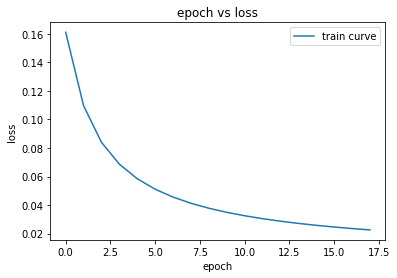

In [19]:
# plotting graph for epoch vs loss for train and test data

w,b,train_loss,epochs = custom_train(train_vectors_stand, train_category.values, 0.0001,0.0001,0.001)
plt.plot(range(epochs),train_loss,label='train curve')
plt.title('epoch vs loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 8. Custom function to make predictions using logistic regression model

In [20]:
def predict(w,b, X):
    '''function to predict label given weights, bias and standardized data'''
    X_len = len(X)
    predictions = []

    for i in range(X_len):
      sigma_value = custom_sigmoid(np.dot(w,X[i]) + b)

      predictions.append(1) if sigma_value >= 0.5 else predictions.append(0)
        

    return predictions #it should be a numpy array

### Grader Function - 5

In [21]:
def grader_predict():
  ''' grader to check the test accuracy'''
  w,b,_,_ = custom_train(train_vectors_stand, train_category.values, 0.0001,0.0001,0.001)
  test_preds= predict(w,b,test_vectors_stand)
  test_accuracy= (np.sum(test_category==test_preds)/len(test_preds))*100
  if(test_accuracy>=90):
    print("Success! ")
  else:
    print("Failed! \n Test accuracy = ", test_accuracy)
  return
  
grader_predict()

Success! 
